<a href="https://colab.research.google.com/github/CeciliaAlinaitwe/Final-project-data-driven/blob/main/Final_project_data_driven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ECOMMERCE CONSUMER BEHAVIOUR ANALYSIS

In this analysis we are going to analyse and compare 4 different networks that is Erdos Renyi, Barabasi Albert, Watts Strogatz and our real world network, E-commerce Network.

I am going to analyse these networks using centrality measures, degree distributions, path analysis and connectivity analysis.

The data frame has been collected from kaggle and will help us to visualise this information and compare networks.

In [1]:
!pip install kagglehub

In [2]:
import kagglehub

path = kagglehub.dataset_download("salahuddinahmedshuvo/ecommerce-consumer-behavior-analysis-data") ##download the data set

print("Path to dataset files:", path)

100%|██████████| 43.2k/43.2k [00:00<00:00, 21.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/salahuddinahmedshuvo/ecommerce-consumer-behavior-analysis-data/versions/1


In [3]:
import os

files = os.listdir(path) ## list of the files in the dataset
print("Files in dataset folder:", files)


Files in dataset folder: ['Ecommerce_Consumer_Behavior_Analysis_Data.csv']


SHOWING DATASET CONTENTS

Here I am showing a preview of my df

In [4]:
import pandas as pd
file_path = os.path.join(path, "Ecommerce_Consumer_Behavior_Analysis_Data.csv") ##display file path ie. how to locate this file

df = pd.read_csv(file_path)##loading the dataset

print(df.info()) ##showing the data
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

CREATING RELATIONSHIPS BETWEEN THE DATA STRUCTURES

Creating a relationship between customer id and purchase category will help me produce more meaningful results

In [5]:
##finding the relationships between the data
print(df.columns) ##check out all columns
print(df["Customer_ID"].nunique()) ##checking for unique users
print(df['Purchase_Category'].value_counts())##checking for most popular products

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Marital_Status',
       'Education_Level', 'Occupation', 'Location', 'Purchase_Category',
       'Purchase_Amount', 'Frequency_of_Purchase', 'Purchase_Channel',
       'Brand_Loyalty', 'Product_Rating',
       'Time_Spent_on_Product_Research(hours)', 'Social_Media_Influence',
       'Discount_Sensitivity', 'Return_Rate', 'Customer_Satisfaction',
       'Engagement_with_Ads', 'Device_Used_for_Shopping', 'Payment_Method',
       'Time_of_Purchase', 'Discount_Used', 'Customer_Loyalty_Program_Member',
       'Purchase_Intent', 'Shipping_Preference', 'Time_to_Decision'],
      dtype='object')
1000
Purchase_Category
Electronics                  54
Sports & Outdoors            51
Jewelry & Accessories        50
Home Appliances              50
Toys & Games                 47
Animal Feed                  44
Food & Beverages             44
Gardening & Outdoors         44
Packages)                    43
Software & Apps              43
Furnit

DATA VISUALISATION

Here I am visualising my data from the entire graph in its wholeness

Number of nodes: 1024
Number of edges: 1000


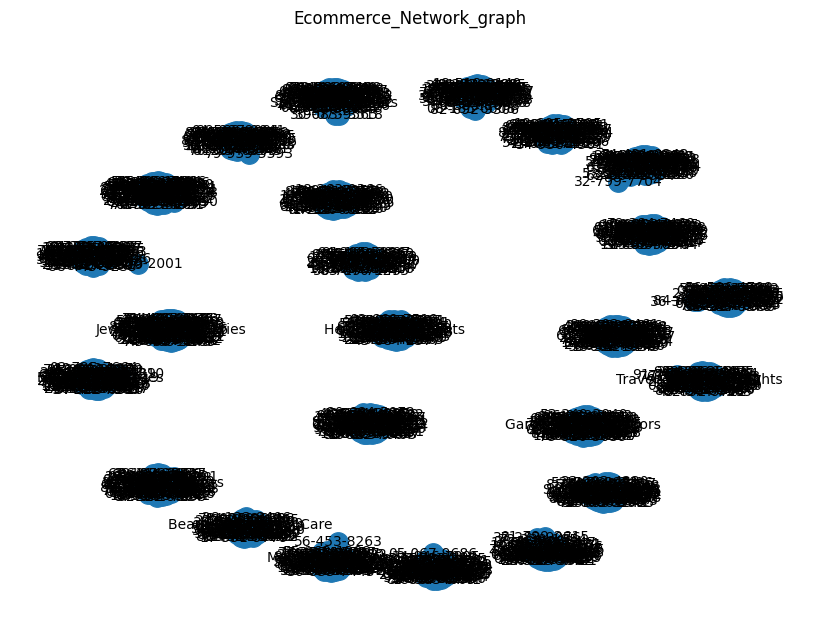

In [6]:
##visualistaion of the data
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv(file_path)

G=nx.Graph()

##adding edges
for index, row in df.iterrows():
    if pd.notnull(row["Customer_ID"]) and pd.notnull(row["Purchase_Category"]):  # making sure theres no null values
        G.add_edge(str(row["Customer_ID"]), str(row["Purchase_Category"]))  # connecting the graph
##confirming if we have nodes
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

plt.figure(figsize=(8,6)) ##visualise the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos,
    with_labels=True,node_size=200,
    edge_color="gray",
    font_size=10, linewidths=0.8)

plt.title("Ecommerce_Network_graph")
plt.show()


Original Graph Nodes: 1024 Edges: 1000
Connected Subgraph Nodes: 55 Edges: 54


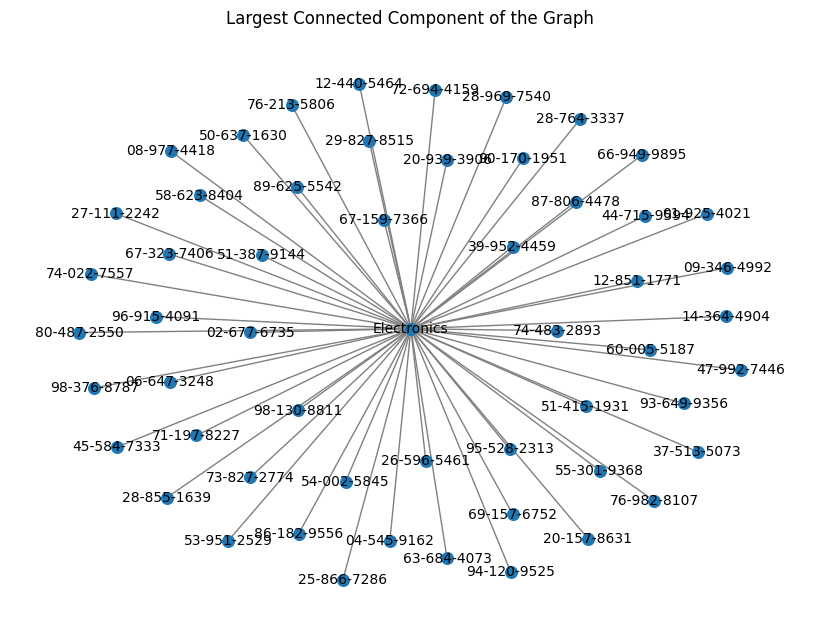

In [7]:
##creating a subgraph of the largest connected component
##This subgraph is important to show connectivity of a single most connected node

largest_cc = max(nx.connected_components(G), key=len)  # identify all connected components and get the largest
G_connected = G.subgraph(largest_cc).copy()# Create a subgraph using only the nodes from the largest connected component

print("Original Graph Nodes:", G.number_of_nodes(), "Edges:", G.number_of_edges()) ##to show nodes of original
print("Connected Subgraph Nodes:", G_connected.number_of_nodes(), "Edges:", G_connected.number_of_edges()) #to show nodes of new graph

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G_connected, seed=42)
nx.draw(G_connected, node_size=70, edge_color="gray",with_labels=True,font_size=10) #setting labels
plt.title("Largest Connected Component of the Graph")
plt.show()


Node with highest degree: ('Electronics', 54)
Graph Density: 0.03636363636363636


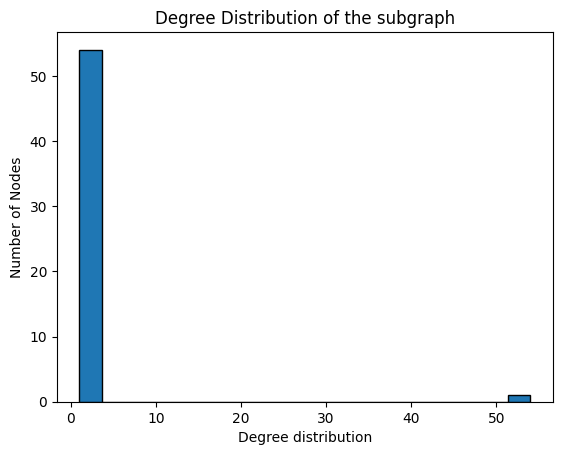

In [28]:
#degree distribution for the subgraph
degree_values = [d for n, d in G_connected.degree()] ##retrieving the degree of node
plt.hist(degree_values, bins=20, edgecolor="black")
plt.xlabel("Degree distribution")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution of the subgraph")
print("Node with highest degree:", max(G_connected.degree(), key=lambda x: x[1]))
print("Graph Density:", nx.density(G_connected))#show density to show graph connection
plt.show()


In [ ]:
## TOP CENTRALITY MEASURES FOR THE ECOMMERCE NETWORK

##I decided to do this separately before i compute together with the other graphs

In [ ]:
##betweenness centrality
betweenness_centrality=nx.betweenness_centrality(G)
top_betweenness=sorted(betweenness_centrality.items(),key=lambda x:x[1],reverse=True)[:5]
for node,score in top_betweenness:
 print(f"node:{node},betweenness_centrality:{score:.4f}")

node:Electronics,betweenness_centrality:0.0027
node:Sports & Outdoors,betweenness_centrality:0.0024
node:Home Appliances,betweenness_centrality:0.0023
node:Jewelry & Accessories,betweenness_centrality:0.0023
node:Toys & Games,betweenness_centrality:0.0021


In [ ]:
##degree centrality
degree_centrality=nx.degree_centrality(G)
top_degree_centrality=sorted(degree_centrality.items(),key=lambda x:x[1],reverse=True)[:5]
for node, score in top_degree_centrality:
 print(f"Node:{node},degree_centrality:{score:.4f}")

Node:Electronics,degree_centrality:0.0528
Node:Sports & Outdoors,degree_centrality:0.0499
Node:Home Appliances,degree_centrality:0.0489
Node:Jewelry & Accessories,degree_centrality:0.0489
Node:Toys & Games,degree_centrality:0.0459


In [ ]:
##eigenvector
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
top_eigenvector_centrality=sorted(eigenvector_centrality.items(),key=lambda x:x[1],reverse=True)[:5]
for node, score in top_eigenvector_centrality:
 print(f"node:{node},eigenvector_centrality:{score:.4f}")

node:Electronics,eigenvector_centrality:0.7071
node:67-159-7366,eigenvector_centrality:0.0962
node:58-623-8404,eigenvector_centrality:0.0962
node:09-346-4992,eigenvector_centrality:0.0962
node:71-197-8227,eigenvector_centrality:0.0962


In [ ]:
##page rank
pr=nx.pagerank(G,alpha=0.9)
top_pagerank=sorted(pr.items(),key=lambda x:x[1],reverse=True)[:5]
for node, score in top_pagerank:
  print(f"node:{node},pr:{score:.4f}")

node:Electronics,pr:0.0255
node:Sports & Outdoors,pr:0.0241
node:Home Appliances,pr:0.0236
node:Jewelry & Accessories,pr:0.0236
node:Toys & Games,pr:0.0222


In [ ]:
##closeness
closeness_centrality = nx.closeness_centrality(G)
top_closeness_centrality=sorted(closeness_centrality.items(),key=lambda x:x[1],reverse=True)[:5]
for node, score in top_closeness_centrality:
 print(f"node:{node},closeness_centrality:{score:.4f}")

node:Electronics,closeness_centrality:0.0528
node:Sports & Outdoors,closeness_centrality:0.0499
node:Home Appliances,closeness_centrality:0.0489
node:Jewelry & Accessories,closeness_centrality:0.0489
node:Toys & Games,closeness_centrality:0.0459


In [ ]:
##Harmonic
harmonic_centrality=nx.harmonic_centrality(G)
top_harmonic_centrality=sorted(harmonic_centrality.items(),key=lambda x:x[1],reverse=True)[:5]
for node, score in top_harmonic_centrality:
 print(f"node:{node} ,harmonic_centrality:{score:.4f}")

node:Electronics ,harmonic_centrality:54.0000
node:Sports & Outdoors ,harmonic_centrality:51.0000
node:Jewelry & Accessories ,harmonic_centrality:50.0000
node:Home Appliances ,harmonic_centrality:50.0000
node:Toys & Games ,harmonic_centrality:47.0000


ERDOS RENYI GRAPH

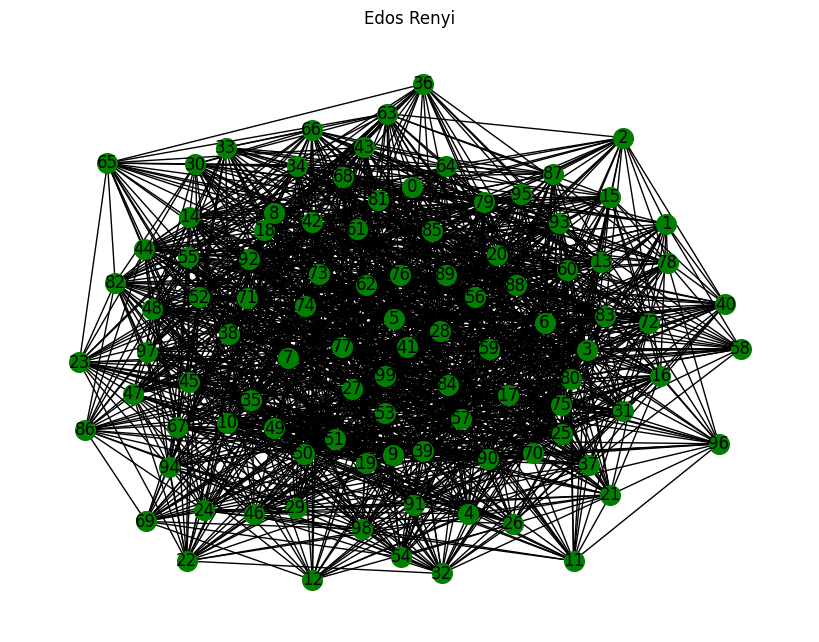

In [29]:
def create_random_network(num_nodes=100, probability=28):
  erdos_renyi_graph=nx.erdos_renyi_graph(num_nodes, probability)
  return erdos_renyi_graph
def visualise_network(erdos_renyi_graph):
   plt.figure(figsize=(8,6))
   pos=nx.spring_layout(erdos_renyi_graph) ##Layout for better visualisation
   nx.draw(erdos_renyi_graph,pos, with_labels=True, node_color='green', node_size=200,edge_color='black', linewidths=1,font_size=12)
   plt.title("Edos Renyi")
   plt.show
if __name__=="__main__":
   num_nodes=100
   probability=0.3
   erdos_renyi_graph=nx.erdos_renyi_graph(100,0.3)
   random_graph=create_random_network(num_nodes,probability)
   visualise_network(random_graph)



WATTS STROGATZ

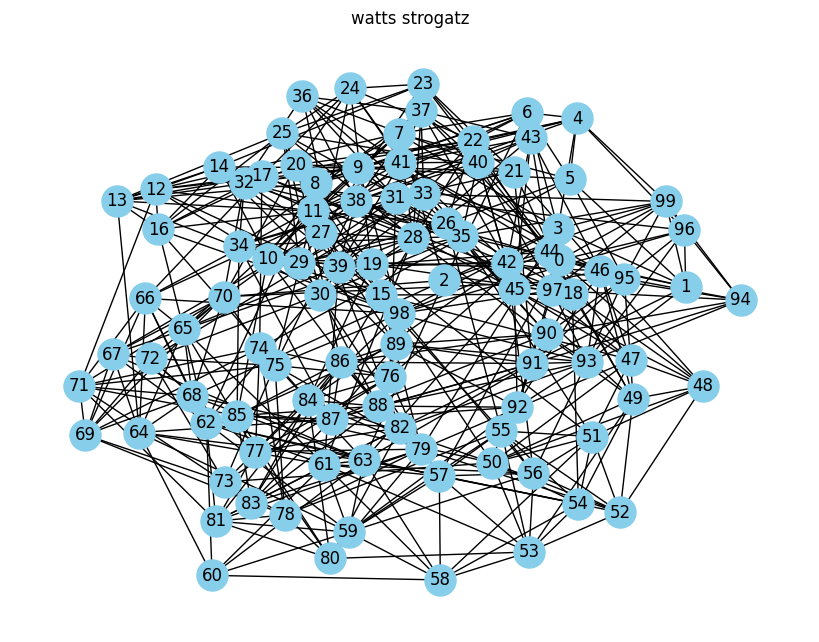

In [10]:
def create_watts_strogatz_graph(num_nodes=100,k=2,probability=0.3):
  watts_strogatz_graph=nx.watts_strogatz_graph(num_nodes,k, probability)
  return watts_strogatz_graph
def visualise_network(watts_strogatz_graph):
   plt.figure(figsize=(8,6))
   pos=nx.spring_layout(watts_strogatz_graph) ##Layout for better visualisation
   nx.draw(watts_strogatz_graph,pos, with_labels=True, node_color='skyblue', node_size=500,edge_color='black', linewidths=1,font_size=12)
   plt.title("watts strogatz")
   plt.show()
if __name__=="__main__":
  num_nodes=100
  probability=0.3
  k=2
  WS_g=create_watts_strogatz_graph(num_nodes,k,probability)

  WS_g=nx.watts_strogatz_graph(100,10,0.3)
  visualise_network(WS_g)

BARABASI

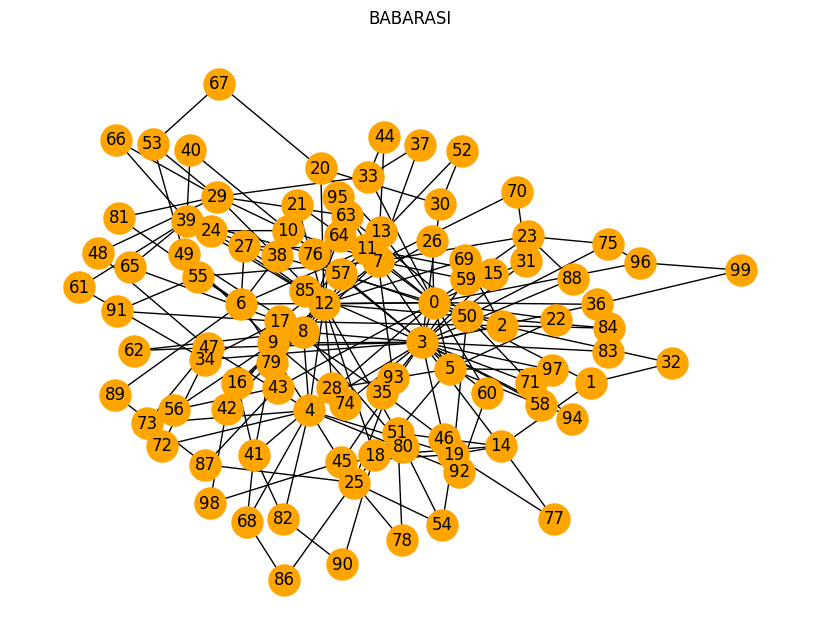

In [11]:
def create_barabasi_albert_graph(num_nodes=100, m=2):
  barabasi_albert_graph=nx.barabasi_albert_graph(num_nodes,m)
  return barabasi_albert_graph

def visualise_network(barabasi_albert_graph):
   plt.figure(figsize=(8,6))
   pos=nx.spring_layout(barabasi_albert_graph) ##Layout for better visualisation
   nx.draw(barabasi_albert_graph,pos, with_labels=True, node_color='orange', node_size=500,edge_color='black', linewidths=1,font_size=12)
   plt.title("BABARASI")
   plt.show()
if __name__=="__main__":
  num_nodes=100
  m=2
  B_g=create_barabasi_albert_graph(num_nodes,m)

  B_g=nx.barabasi_albert_graph(100,2)

  visualise_network(B_g)


COMPARING CENTRALITY MEASURES

Centrality measures help in determing how close and with which ease information spreads among different networks.

This comparison is important to see the differences with real world networks.

In [26]:
##CENTRALITY MEASURES IN COMPARISON WITH ALL 4 GRAPHS

def display_top_central_nodes(graph, centrality_function, centrality_name, top_n=5):
    centrality_values = centrality_function(graph)
    sorted_centrality = sorted(centrality_values.items(), key=lambda x: x[1], reverse=True) ##helps to identify most important nodes

    print(f"Top {top_n} nodes by {centrality_name}:")
    for i, (node, centrality) in enumerate(sorted_centrality[:top_n]):
        print(f"{i+1}. Node: {node}, {centrality_name}: {centrality}")
    print("----------------")

# Define your graphs
graphs = {
    "Erdos-Renyi": erdos_renyi_graph,
    "Watts-Strogatz": WS_g,
    "Barabasi-Albert": B_g,
    "Ecommerce Network": G,
}

# List of centrality functions to compare
centrality_functions = {
    "Degree Centrality": nx.degree_centrality,
    "Eigenvector Centrality": nx.eigenvector_centrality,
    "PageRank": nx.pagerank,
    "Closeness Centrality": nx.closeness_centrality,
    "Betweenness Centrality": nx.betweenness_centrality,
    "Harmonic Centrality": nx.harmonic_centrality,
}

# Iterate over each graph and each centrality measure to display top nodes
for graph_name, graph in graphs.items():
    print(f"{graph_name}")
    for centrality_name, centrality_function in centrality_functions.items():
        try: ##here we incorporate the try and except to capture errors in computation
            display_top_central_nodes(graph, centrality_function, centrality_name, top_n=5)
        except nx.PowerIterationFailedConvergence as e:
            print(f"Error calculating {centrality_name} for {graph_name}: {e}")


Erdos-Renyi
Top 5 nodes by Degree Centrality:
1. Node: 81, Degree Centrality: 0.43434343434343436
2. Node: 23, Degree Centrality: 0.4141414141414142
3. Node: 21, Degree Centrality: 0.393939393939394
4. Node: 96, Degree Centrality: 0.38383838383838387
5. Node: 85, Degree Centrality: 0.37373737373737376
----------------
Top 5 nodes by Eigenvector Centrality:
1. Node: 81, Eigenvector Centrality: 0.1452485270006034
2. Node: 23, Eigenvector Centrality: 0.13654127319665843
3. Node: 21, Eigenvector Centrality: 0.1316604451609203
4. Node: 85, Eigenvector Centrality: 0.12776722177559402
5. Node: 96, Eigenvector Centrality: 0.12607087412275986
----------------
Top 5 nodes by PageRank:
1. Node: 81, PageRank: 0.013788126854494626
2. Node: 23, PageRank: 0.013239009590457394
3. Node: 21, PageRank: 0.012651225188718087
4. Node: 96, PageRank: 0.012391846221911178
5. Node: 85, PageRank: 0.012032352016989325
----------------
Top 5 nodes by Closeness Centrality:
1. Node: 81, Closeness Centrality: 0.63870

COMPARING DENSITIES

The density measurements help in seeing how connected the graph is. When the graph is weakly connected theres less edges compared to the maximum edges and the opposite is true.

In [15]:
##density for all graphs
print(nx.density(WS_g))
print(nx.density(B_g))
print(nx.density(erdos_renyi_graph))
print(nx.density(G)) ##since the graph is fully connected from the coefficient results

0.10101010101010101
0.039595959595959594
0.2997979797979798
0.0019092130987292278


COMPARING  CLUSTERING COEFFICIENTS AND DEGREE DISTRIBUTIONS

In this section, Ill bring to you the degree distributions to show the spread of the data across all 4 graphs.

A power-law degree distribution will mean some nodes are well connected while others arent really connected as good.

A uniform distribution means that all node degrees are practically so similar.

In [34]:
##Clustering coefficients

specific_nodes = [0, 1, 3] #specifying nodes for the rest of the graphs
specificied_nodes=["Food & Beverages","Gardening & Outdoors","Electronics"] ##for the real world graph

# For each graph, calculate the clustering coefficient for the specific nodes
print("Ecommerce network clustering for specific nodes:", {node: nx.clustering(G, node) for node in specificied_nodes})
print("Barabasi-Albert clustering for specific nodes:", {node: nx.clustering(B_g, node) for node in specific_nodes})
print("Watts-Strogatz clustering for specific nodes:", {node: nx.clustering(WS_g, node) for node in specific_nodes})
print("Erdos-Renyi clustering for specific nodes:", {node: nx.clustering(erdos_renyi_graph, node) for node in specific_nodes})


Ecommerce network clustering for specific nodes: {'Food & Beverages': 0, 'Gardening & Outdoors': 0, 'Electronics': 0}
Barabasi-Albert clustering for specific nodes: {0: 0.07368421052631578, 1: 0, 3: 0.037037037037037035}
Watts-Strogatz clustering for specific nodes: {0: 0.1388888888888889, 1: 0.2857142857142857, 3: 0.2545454545454545}
Erdos-Renyi clustering for specific nodes: {0: 0.28520499108734404, 1: 0.34656084656084657, 3: 0.31451612903225806}


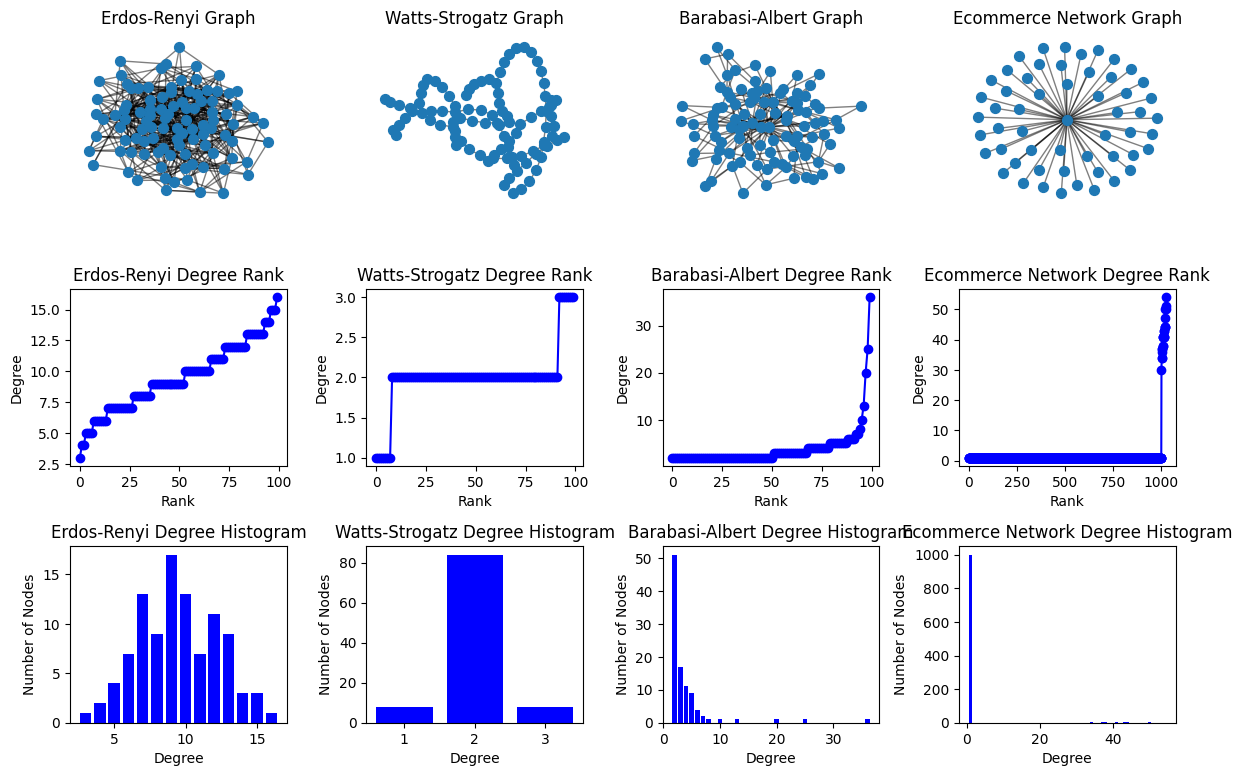

In [17]:
##degree distribution
##We establish a realtionship between customers and purchases in the real world scenario

# Create edges: (Customer_ID) → (Purchase_Category)
edges = df[['Customer_ID', 'Purchase_Category']].dropna()  # drop missing values

G_ecom = nx.from_pandas_edgelist(edges, source="Customer_ID", target="Purchase_Category") ##bipartite network

# Creating the graph from real world
G_ecom = nx.from_pandas_edgelist(df, source="Customer_ID", target="Purchase_Category")

# Generating the other synthetic graphs for comparison
G_er = nx.erdos_renyi_graph(100, 0.1, seed=42)
G_ws = nx.watts_strogatz_graph(100, 2, 0.1, seed=42)
G_bg = nx.barabasi_albert_graph(100, 2, seed=42)

# graph dictionary
graphs = {
    "Erdos-Renyi": G_er,
    "Watts-Strogatz": G_ws,
    "Barabasi-Albert": G_bg,
    "Ecommerce Network": G_ecom,
}

# Creating subplots
fig = plt.figure(figsize=(12, 10))
axgrid = fig.add_gridspec(4, len(graphs))

for i, (name, G) in enumerate(graphs.items()): ##for iteration over all 4 graphs

    # node Degree Sequence
    degree_sequence = sorted((d for n, d in G.degree()))

    # for the case of disconnected graphs
    try:
        Gcc = G.subgraph(max(nx.connected_components(G), key=len))
    except ValueError:
        Gcc = G_connected ##using the subgraph created to get more visuals

    # here we plot the Graph Structure
    ax0 = fig.add_subplot(axgrid[0, i])
    pos = nx.spring_layout(Gcc, seed=42)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=50)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.5)
    ax0.set_title(f"{name} Graph")
    ax0.set_axis_off()

    # showing Degree Rank Plot results
    ax1 = fig.add_subplot(axgrid[1, i])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title(f"{name} Degree Rank")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    # showing Degree Histogram results
    ax2 = fig.add_subplot(axgrid[2, i])
    unique_degrees, counts = np.unique(degree_sequence, return_counts=True) #setting values to unique
    ax2.bar(unique_degrees, counts, width=0.8, color="b")
    ax2.set_title(f"{name} Degree Histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("Number of Nodes")

fig.tight_layout()
plt.show()


COMPARING THE CONNECTED COMPONENTS

In this analysis I am trying to find the most connected and reacheable nodes.

Erdos-Renyi: Number of connected components = 1
Erdos-Renyi: Largest connected component size = 100


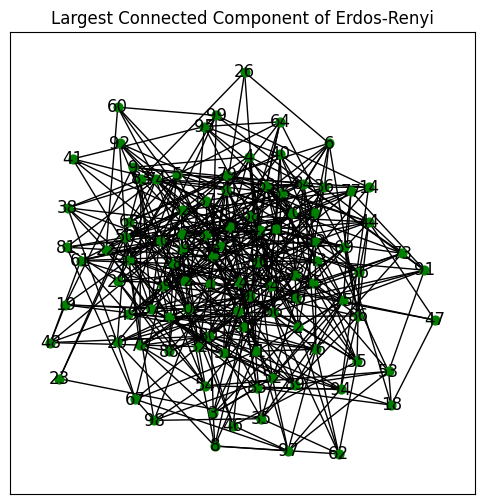

Watts-Strogatz: Number of connected components = 1
Watts-Strogatz: Largest connected component size = 100


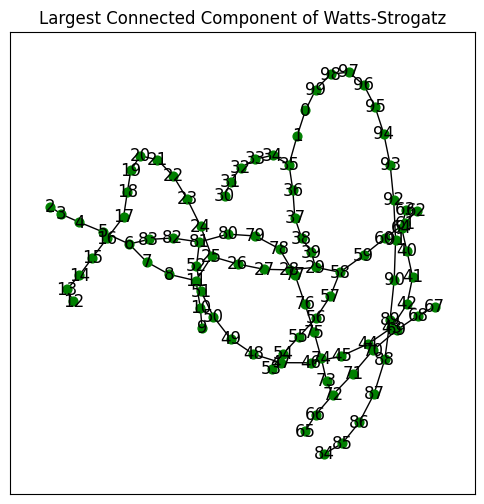

Barabasi-Albert: Number of connected components = 1
Barabasi-Albert: Largest connected component size = 100


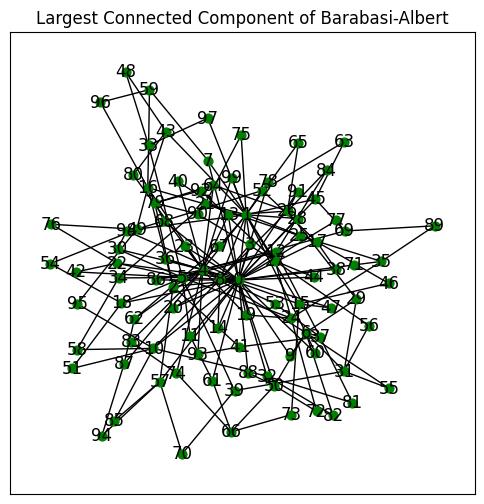

Ecommerce Network: Number of connected components = 24
Ecommerce Network: Largest connected component size = 55


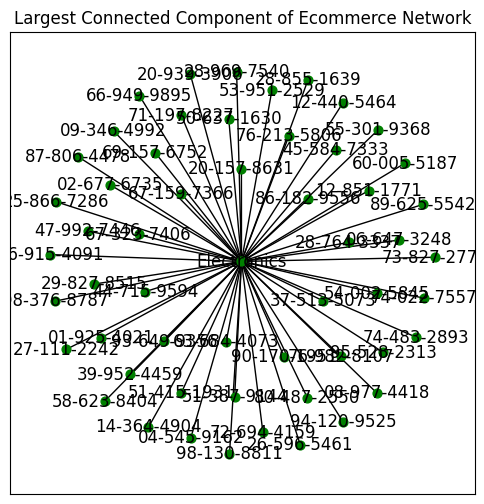

In [18]:
# Iterate through each graph
for name, G in graphs.items():
    if nx.is_directed(G):  # Checking if the graph is directed
        G = G.to_undirected()

    # here we find the connected components
    #setting to name generates names for each specific graph
    connected_components = list(nx.connected_components(G))
    print(f"{name}: Number of connected components = {len(connected_components)}")

    largest_component = max(connected_components, key=len) ##getting the largest component
    print(f"{name}: Largest connected component size = {len(largest_component)}")

    # Using the subgraph of the largest component to show clearer results
    Gcc = G.subgraph(largest_component)

    # Plotting the largest component
    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(Gcc, seed=42)
    nx.draw_networkx(Gcc, pos, node_size=40, node_color="g", with_labels=True)
    plt.title(f"Largest Connected Component of {name}")
    plt.show()


PATH ANALYSIS

Diameter: This shows that information travels fast

Average shortest path: This shows the efficiency of information flow (how many steps it takes for information to travel)

In [19]:
##diameter analysis

graphs = {
    "Erdos-Renyi": G_er,
    "Watts-Strogatz": G_ws,
    "Barabasi-Albert": G_bg,
    "Ecommerce Network": G_ecom
}
##using the if and else function to find diameter for my real  network since its disconnected
for name, G in graphs.items():
    if nx.is_connected(G):
        diameter = nx.diameter(G)
        print(f"{name}---Diameter : {diameter}")
    else:
        Gcc = G.subgraph(max(nx.connected_components(G), key=len)).copy() ##using the largest connected component
        diameter = nx.diameter(Gcc)  # its diameter
        print(f"{name} (Disconnected)---Diameter: {diameter}")


Erdos-Renyi---Diameter : 4
Watts-Strogatz---Diameter : 48
Barabasi-Albert---Diameter : 5
Ecommerce Network (Disconnected)---Diameter: 2


In [20]:
##average shortest path
for name, G in graphs.items():
  if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
    print(f"{name} --Average Shortest Path Length: {avg_shortest_path}")
  else:
    print("Graph is disconnected, cannot compute average shortest path.")

  if not nx.is_connected(G):
    # Get the largest connected component
    Gcc = G.subgraph(max(nx.connected_components(G), key=len)).copy()
    avg_shortest_path = nx.average_shortest_path_length(Gcc)
    print(f"{name}--Average Shortest Path Length of Largest Connected Component: {avg_shortest_path}")



Erdos-Renyi --Average Shortest Path Length: 2.2703030303030305
Watts-Strogatz --Average Shortest Path Length: 16.373333333333335
Barabasi-Albert --Average Shortest Path Length: 2.8527272727272726
Graph is disconnected, cannot compute average shortest path.
Ecommerce Network--Average Shortest Path Length of Largest Connected Component: 1.9636363636363636


COMPUTING THE COMMUNITIES USING LOUIVAN,MODULARITY AND THRESHOLD

Modularity: This measure is of how well a graph is divided into communities. The higher the value the more communities present

Community detection: It is important in order to see the level of community clustering. This in turn helps to analyse the common interests and similarities.

Threshold: Can be used to remove certain unwanted weights or edges that dont make so much difference in the graph. However for my graph, i will show for all nodes


Modularity of Erdos-Renyi: 0.2767


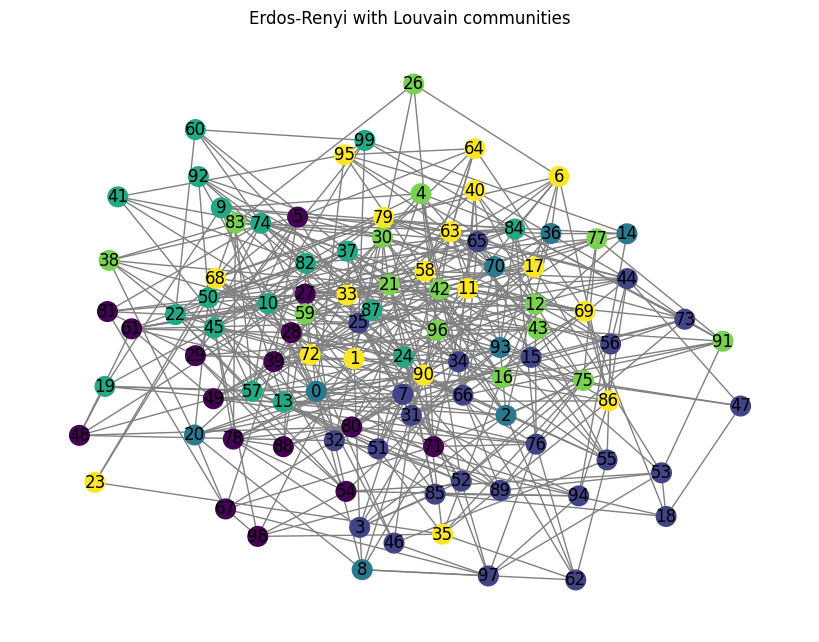

Modularity of Watts-Strogatz: 0.7930


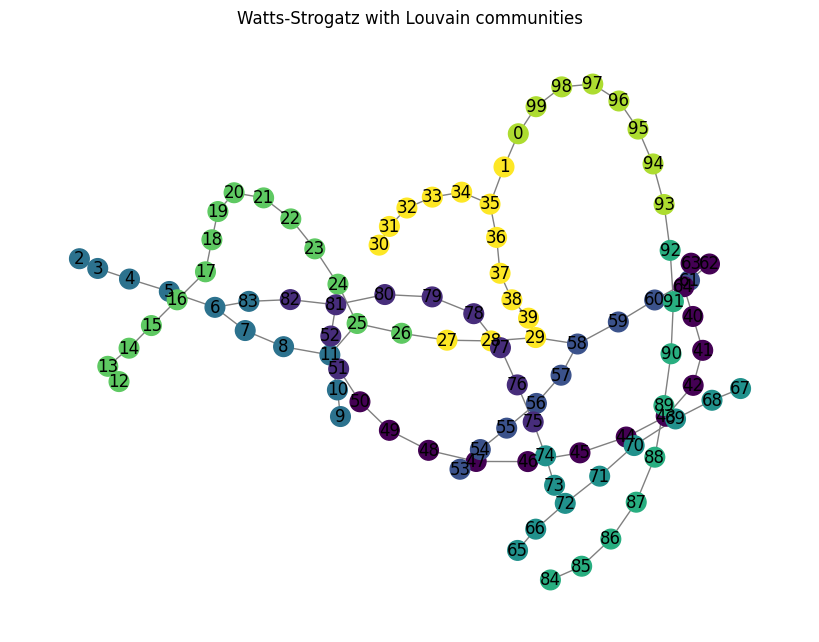

Modularity of Barabasi-Albert: 0.4416


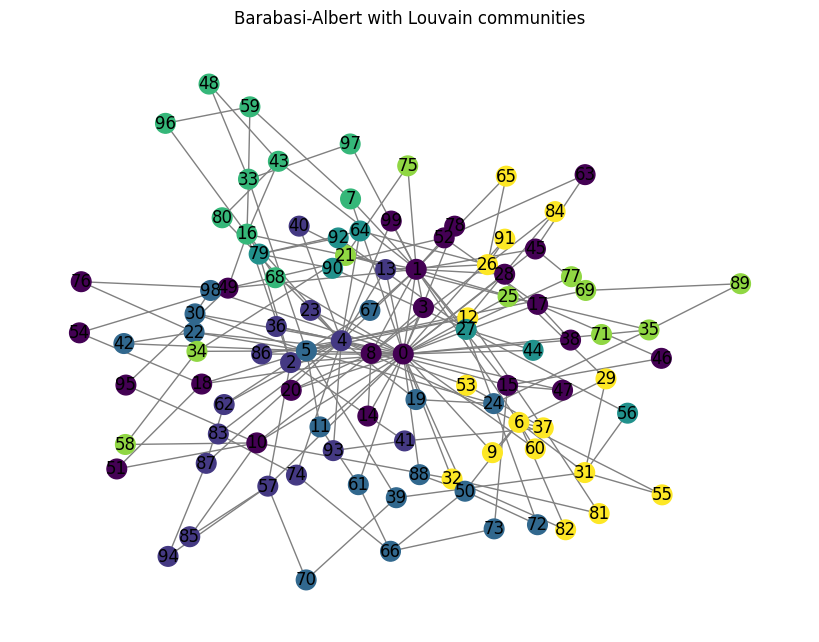

Modularity of Ecommerce Network: 0.9575
Threshold of node Food & Beverages: 0.6772436802975731
Threshold of node Gardening & Outdoors: 0.41382716792096685
Threshold of node Electronics: 0.6098128177851954
Threshold of node Food & Beverages: 0.6772436802975731
Threshold of node Gardening & Outdoors: 0.41382716792096685
Threshold of node Electronics: 0.6098128177851954
Threshold of node Food & Beverages: 0.6772436802975731
Threshold of node Gardening & Outdoors: 0.41382716792096685
Threshold of node Electronics: 0.6098128177851954
Threshold of node Food & Beverages: 0.6772436802975731
Threshold of node Gardening & Outdoors: 0.41382716792096685
Threshold of node Electronics: 0.6098128177851954


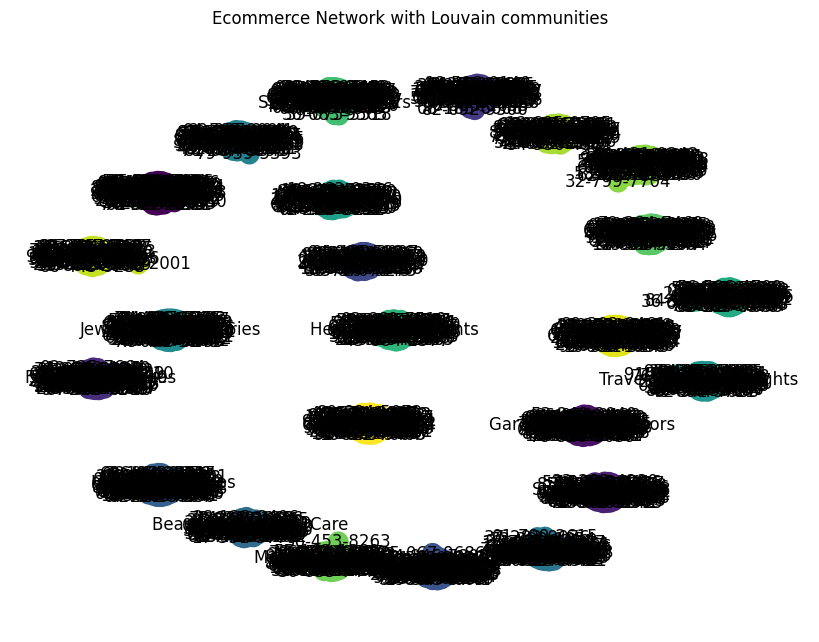

In [37]:
!pip install python-louvain
import community.community_louvain as community
##Loading graphs to ensure accuracy in data reading
graphs = {
    "Erdos-Renyi": G_er,
    "Watts-Strogatz": G_ws,
    "Barabasi-Albert": G_bg,
    "Ecommerce Network": G_ecom
}

for name, G in graphs.items():
    partition = community.best_partition(G)  # Louvain community method

    ##MODULARITY
    modularity = community.modularity(partition, G)  # Modularity value
    print(f"Modularity of {name}: {modularity:.4f}")

    ##THRESHOLD
    threshold = {node: np.random.uniform() for node in G.nodes}
    particular_nodes = [4,89,28,66]
    ecom_particular_nodes=["Food & Beverages","Gardening & Outdoors","Electronics"]

    # Print the threshold values for only selected particular values
    for node in particular_nodes:
     for node in ecom_particular_nodes:
      if node in threshold:  # Check if the node exists in the threshold dictionary
        print(f"Threshold of node {node}: {threshold[node]}")

    # Showing communities
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    colors = [partition[node] for node in G.nodes()]
    nx.draw(G, pos, node_color=colors, with_labels=True, node_size=200, edge_color="gray")
    plt.title(f"{name} with Louvain communities")
    plt.show()
